<a href="https://colab.research.google.com/github/mariahelenass/QuantumComputing/blob/main/Superdense_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit import transpile

## Superdense coding
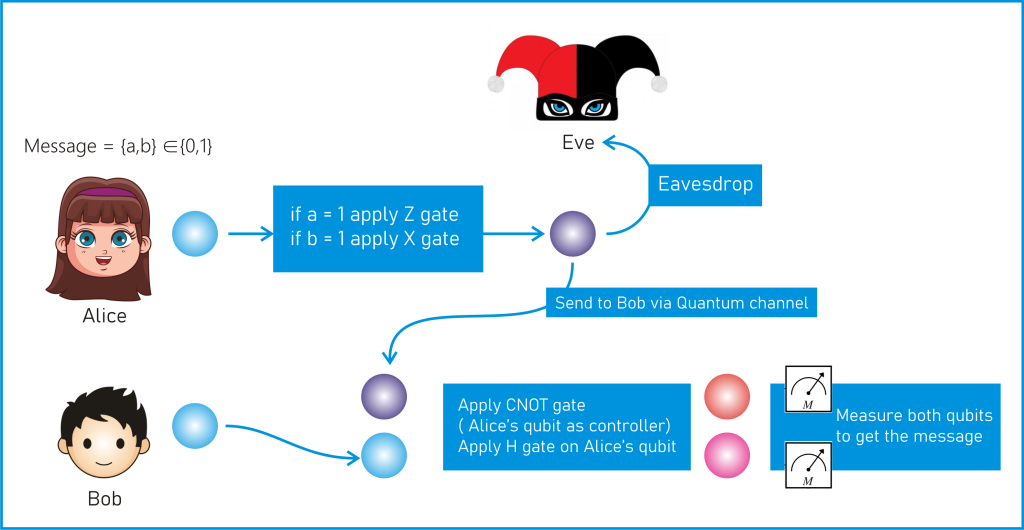

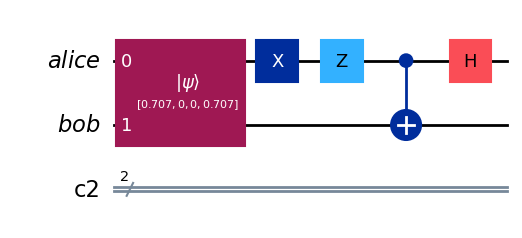

In [ ]:
# Superdense Coding

a = QuantumRegister(1, 'alice')
b = QuantumRegister(1, 'bob')
classical_bits = ClassicalRegister(2)
qcSd = QuantumCircuit(a,b,classical_bits)
qcSd.initialize([ 1/np.sqrt(2), 0, 0, 1/np.sqrt(2) ], [0,1])

# alice operations
qcSd.x(0)
qcSd.z(0)

# bob operations
qcSd.cx(0,1)
qcSd.h(0)

qcSd.draw("mpl")

In [ ]:
qcSd.measure([0,1], [0,1])
simulator_basic = BasicSimulator()
t = transpile(qcSd, backend=simulator_basic)
job = simulator_basic.run(t, shots=1)
result = job.result()
counts = result.get_counts()
print(counts)

{'10': 1}
